This is another example that I followed to learn more about machine learning and the data set 
It was taken from https://machinelearninghd.com/wine-quality-dataset-machine-learning/
The visualizations in this site were extremely helpful and helped me determine what I wanted to do for my project.
I combined the red and white data sets.

In [1]:
# import libraries

!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Read in the csv file

wine_data=pd.read_csv("data/winedata.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [3]:
# view the sample data and the shape

print(wine_data.shape)


(6497, 13)


In [4]:
#  view a sample of the data set

wine_data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
527,6.1,0.28,0.22,1.80,0.034,32.0,116.0,0.98980,3.36,0.44,12.6,6,white
6489,5.4,0.74,0.09,1.70,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6,red
2438,6.9,0.43,0.28,9.40,0.056,29.0,183.0,0.99594,3.17,0.43,9.4,5,white
5760,7.5,0.42,0.32,2.70,0.067,7.0,25.0,0.99628,3.24,0.44,10.4,5,red
5084,7.4,0.39,0.48,2.00,0.082,14.0,67.0,0.99720,3.34,0.55,9.2,5,red
2637,8.7,0.31,0.73,14.35,0.044,27.0,191.0,1.00013,2.96,0.88,8.7,5,white
1480,7.2,0.08,0.49,1.30,0.050,18.0,148.0,0.99450,3.46,0.44,10.2,6,white
3844,6.7,0.37,0.25,2.50,0.028,24.0,84.0,0.99090,3.14,0.36,11.7,6,white
3325,6.8,0.25,0.28,5.00,0.035,42.0,126.0,0.99048,3.12,0.38,12.6,7,white
5005,6.2,0.63,0.31,1.70,0.088,15.0,64.0,0.99690,3.46,0.79,9.3,5,red


In [5]:
# view information about the data set

wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
# used describe to view more information about the data set

wine_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
fixed acidity,6497,NaN,NaN,NaN,7.21531,1.29643,3.8,6.4,7,7.7,15.9
volatile acidity,6497,NaN,NaN,NaN,0.339666,0.164636,0.08,0.23,0.29,0.4,1.58
citric acid,6497,NaN,NaN,NaN,0.318633,0.145318,0,0.25,0.31,0.39,1.66
residual sugar,6497,NaN,NaN,NaN,5.44324,4.7578,0.6,1.8,3,8.1,65.8
chlorides,6497,NaN,NaN,NaN,0.0560339,0.0350336,0.009,0.038,0.047,0.065,0.611
free sulfur dioxide,6497,NaN,NaN,NaN,30.5253,17.7494,1,17,29,41,289
total sulfur dioxide,6497,NaN,NaN,NaN,115.745,56.5219,6,77,118,156,440
density,6497,NaN,NaN,NaN,0.994697,0.00299867,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497,NaN,NaN,NaN,3.2185,0.160787,2.72,3.11,3.21,3.32,4.01
sulphates,6497,NaN,NaN,NaN,0.531268,0.148806,0.22,0.43,0.51,0.6,2


In [7]:
# There are 13 attributes.

## Exploratory Data Analysis

The original code included a heat map. I found this very interesting and explored additional code. A tutorial from GitHub is available: https://github.com/anitaokoh/Understanding-the-Seaborn-heatmap-function

<AxesSubplot:>

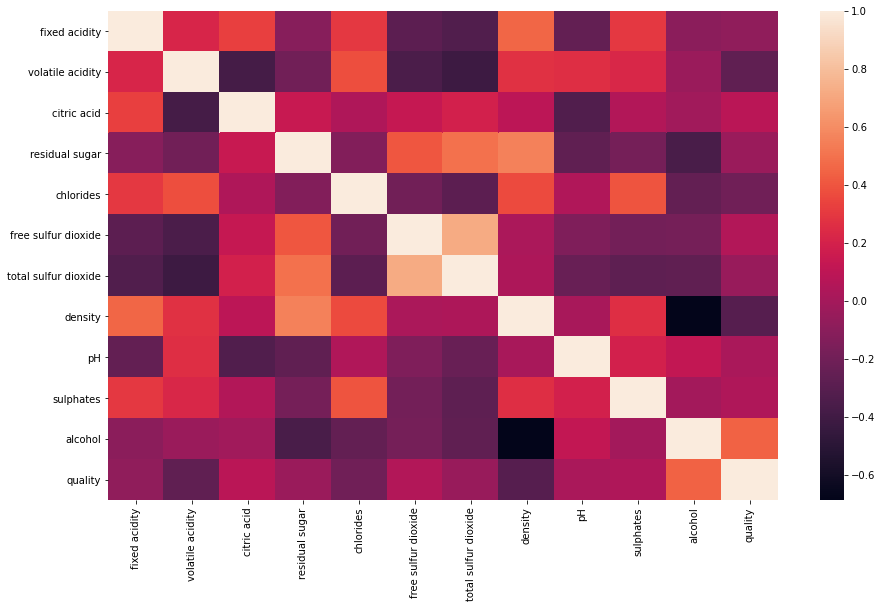

In [9]:
# color only

plt.figure(figsize=(15,9))
sns.heatmap(wine_data.corr())

<AxesSubplot:>

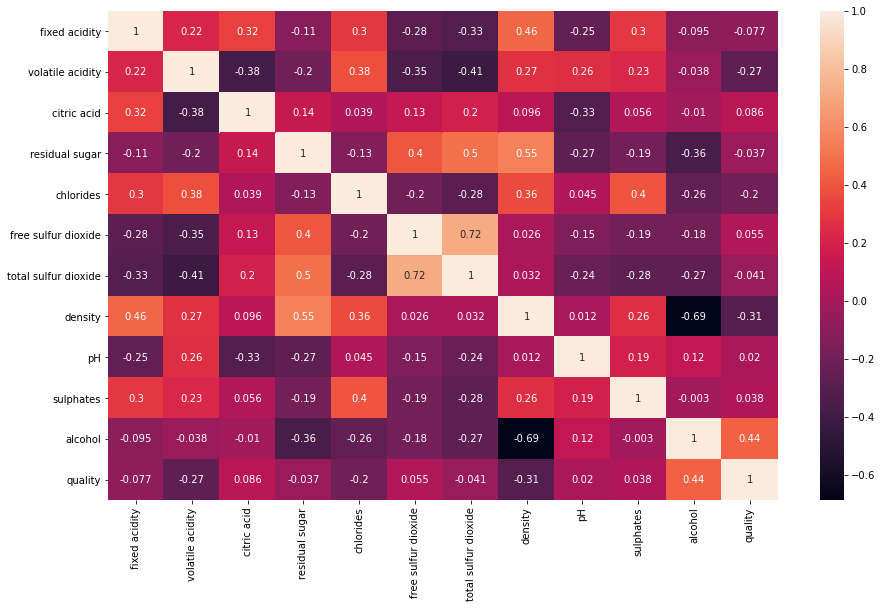

In [11]:
# value included

plt.figure(figsize=(15,9))
sns.heatmap(wine_data.corr(), annot = True)

<AxesSubplot:>

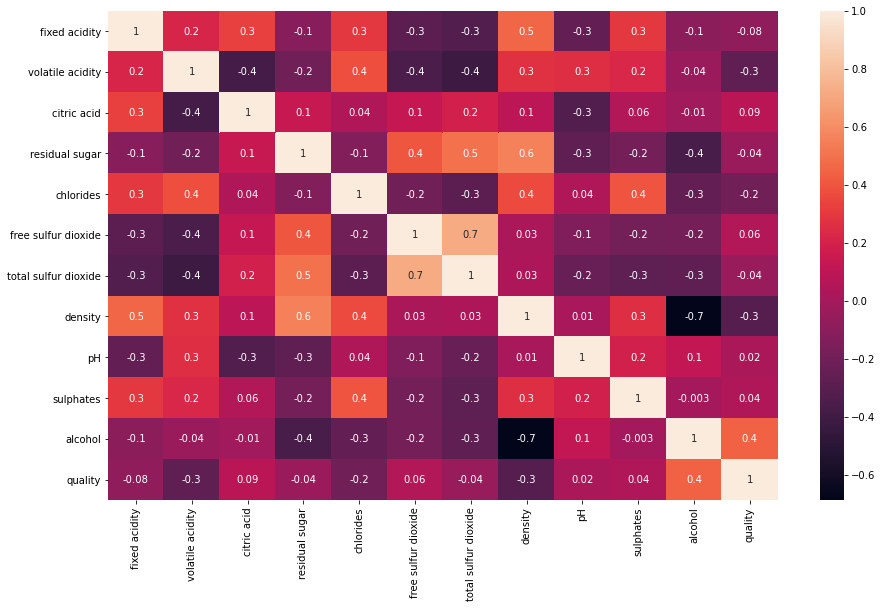

In [13]:
# reduce the number displayed and improve readability

plt.figure(figsize=(15,9))
sns.heatmap(wine_data.corr(), annot = True, fmt='.1g')

<AxesSubplot:>

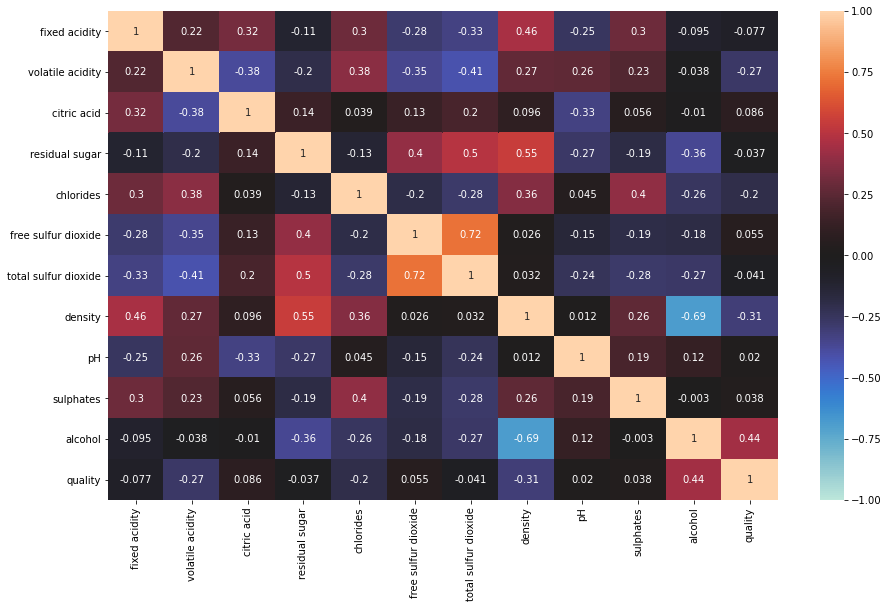

In [14]:
# rescaling the color bar

plt.figure(figsize=(15,9))
sns.heatmap(wine_data.corr(), annot = True, vmin=-1, vmax=1, center= 0)

<AxesSubplot:>

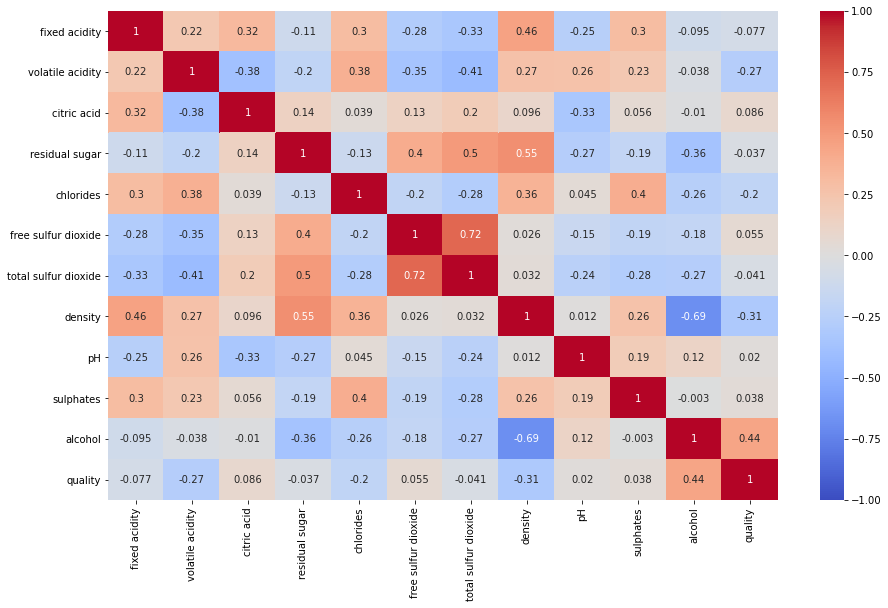

In [15]:
# change the color by specifying the argument

plt.figure(figsize=(15,9))
sns.heatmap(wine_data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

<AxesSubplot:>

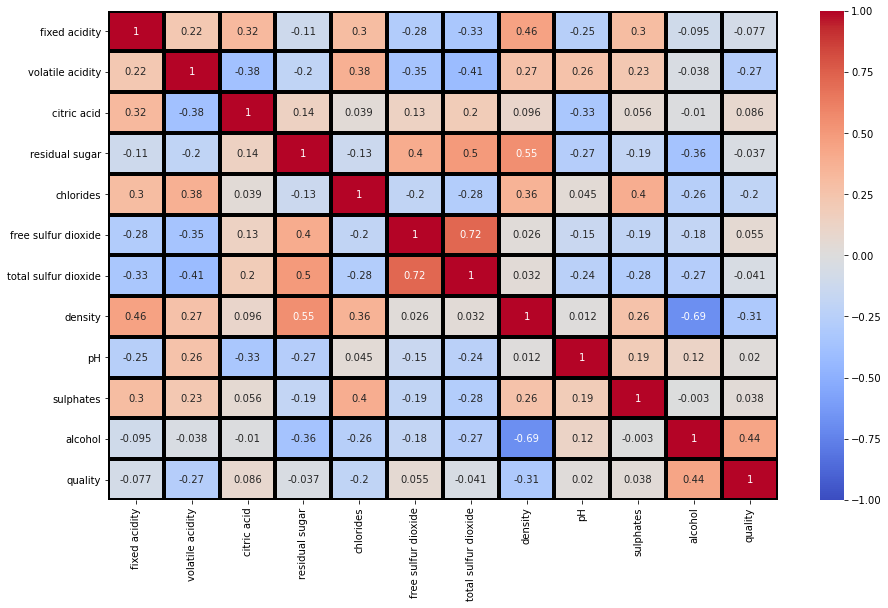

In [16]:
# heatmap may look better with some border thickness and a change of color

plt.figure(figsize=(15,9))
sns.heatmap(wine_data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

<AxesSubplot:>

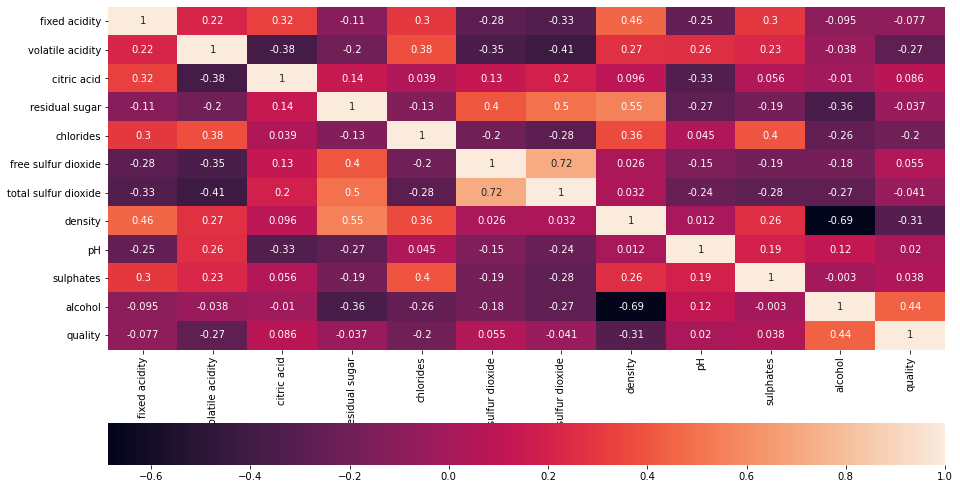

In [17]:
# display with horizontal color bar

plt.figure(figsize=(15,9))
sns.heatmap(wine_data.corr(), annot = True,  cbar_kws= {'orientation': 'horizontal'} )

<AxesSubplot:>

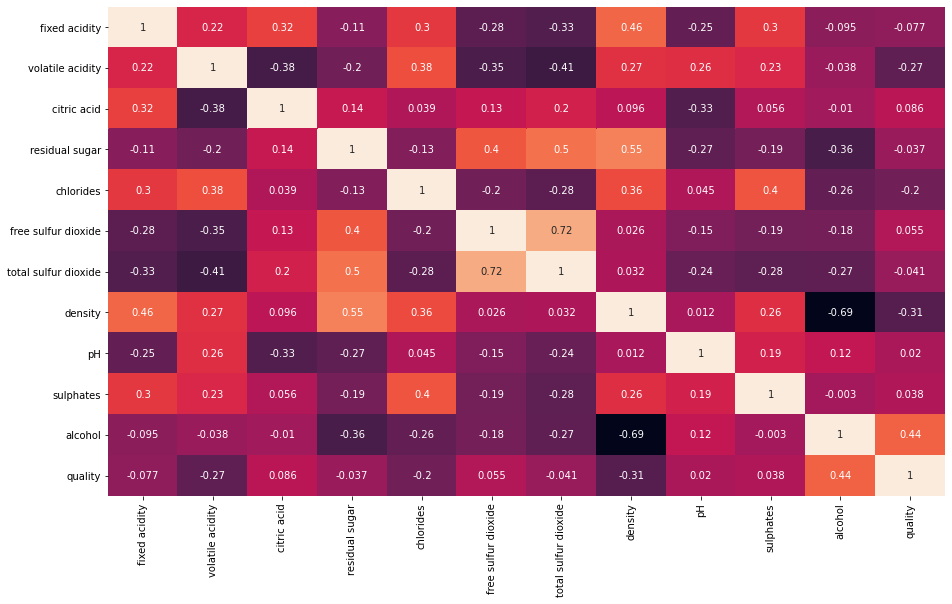

In [21]:
# no color bar

plt.figure(figsize=(15,9))
sns.heatmap(wine_data.corr(), annot = True,  cbar=False)

<AxesSubplot:>

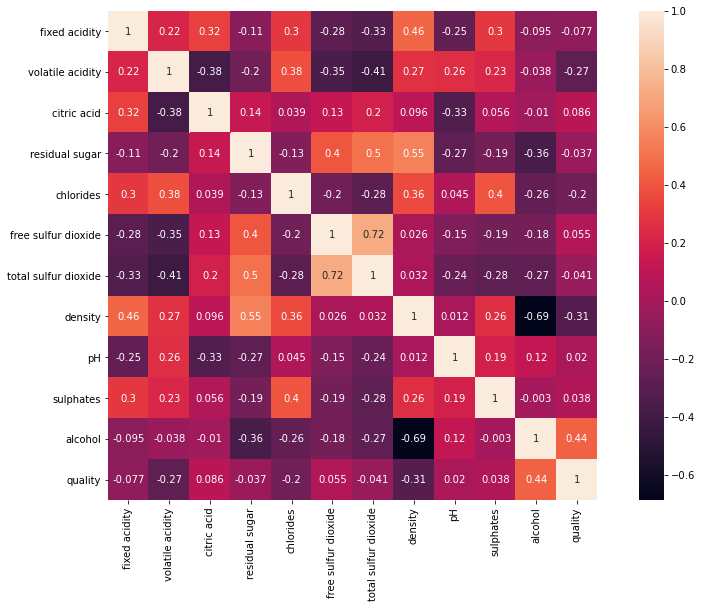

In [23]:
# square

plt.figure(figsize=(15,9))
sns.heatmap(wine_data.corr(), annot = True,square=True)

<AxesSubplot:>

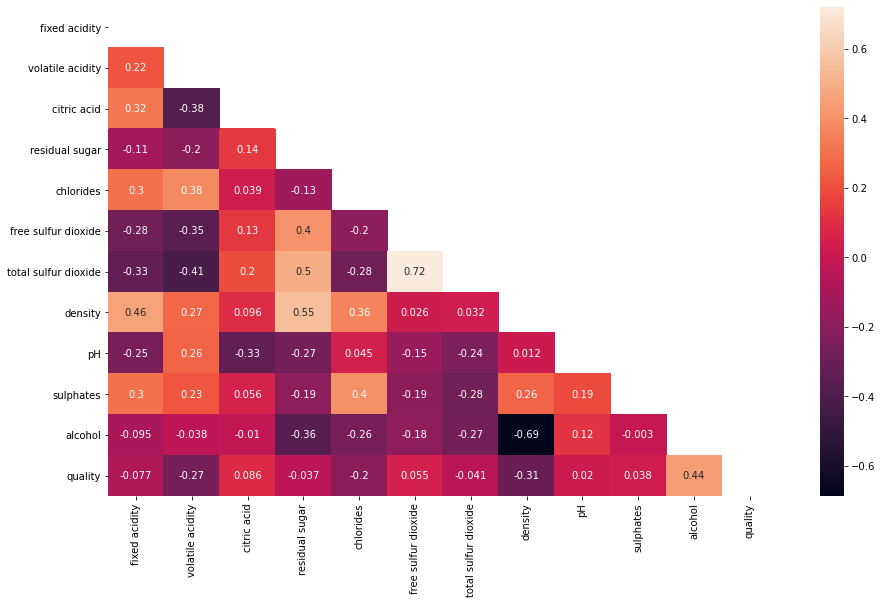

In [25]:
# triangle

plt.figure(figsize=(15,9))
matrix = np.triu(wine_data.corr())
sns.heatmap(wine_data.corr(), annot=True, mask=matrix)

 You can see the following variables are correlated:
 - free sulphur dioxide vs total sulfur dioxide are strongly correlated 0.72
 - density vs alcohol are indirectly correlated -0.69

According to the author, it would be a good idea to drop those variables if performing regression.

<AxesSubplot:>

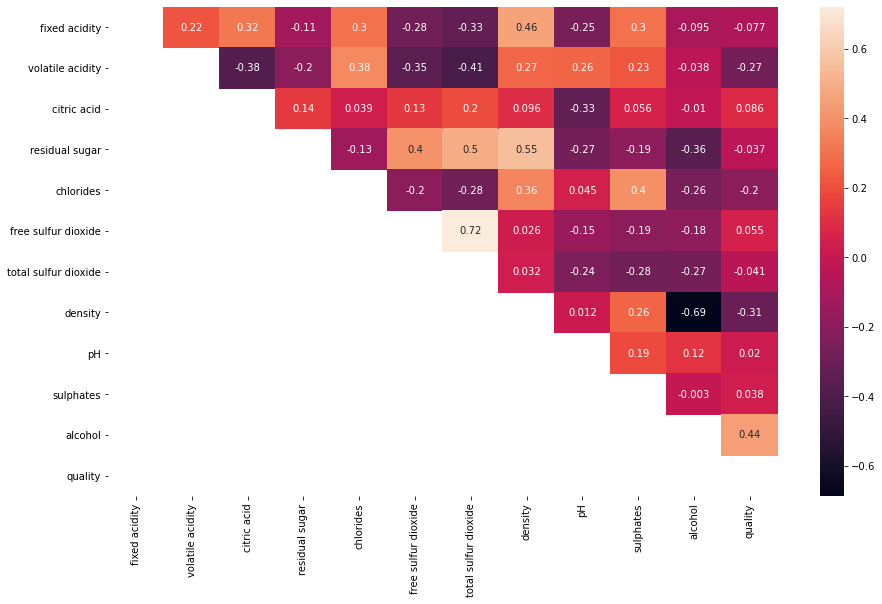

In [26]:
# just another angle

plt.figure(figsize=(15,9))
mask = np.tril(wine_data.corr())
sns.heatmap(wine_data.corr(), annot=True, mask=mask)

<AxesSubplot:>

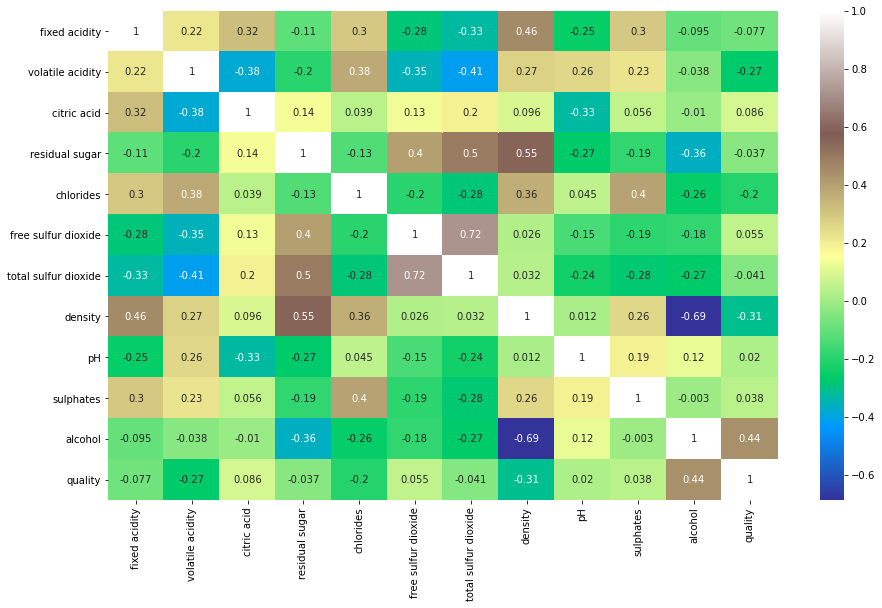

In [27]:
# review correlation map

plt.figure(figsize=(15,9))
sns.heatmap(wine_data.corr(),cmap='terrain',annot=True)

C:\Users\lbruc\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lbruc\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lbruc\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lbruc\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lbruc\anaconda3\envs\PythonAdv\lib\

Text(0.5, 1.0, 'Wine Quality as explained by Fixed Acidity')

<Figure size 720x432 with 0 Axes>

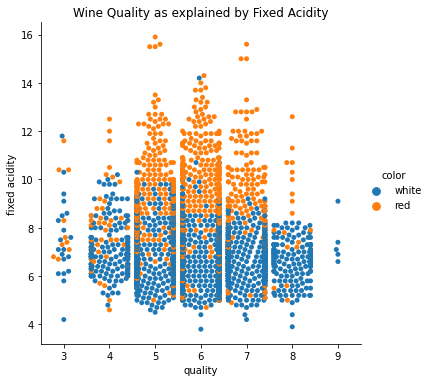

In [30]:
# get some idea of the data
figure = plt.figure(figsize = (10,6))
sns.catplot(x="quality", y="fixed acidity", hue="color", kind="swarm", data=wine_data)
plt.title("Wine Quality as explained by Fixed Acidity")

C:\Users\lbruc\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lbruc\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lbruc\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lbruc\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lbruc\anaconda3\envs\PythonAdv\lib\

Text(0.5, 1.0, 'Wine Quality as explained by Volatile Acidity')

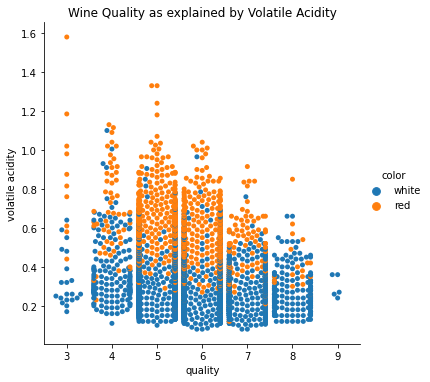

In [31]:
# inspect the relationship between quality and volatile acidity
sns.catplot(x = 'quality', y = 'volatile acidity', hue="color", kind="swarm", data = wine_data)
plt.title("Wine Quality as explained by Volatile Acidity")

## Data Modeling - Classification

In [32]:
# convert string to binary - white = 0, red = 1

def impute_color(x):
    if x == 'white':
        return 0
    else:
        return 1
wine_data['color'] = wine_data['color'].apply(impute_color)

In [33]:
# view a count of each color

wine_data.value_counts('color')

color
0    4898
1    1599
dtype: int64

In [34]:
# Splitting the dataframe into train and test split

from sklearn.model_selection import train_test_split
X = wine_data.drop('color',axis=1)
y = wine_data['color']

In [35]:
# Creating an actual train and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
# Creating a classification model - keep the imbalanced classification issue in perspective

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1624
           1       0.94      0.97      0.96       521

    accuracy                           0.98      2145
   macro avg       0.97      0.98      0.97      2145
weighted avg       0.98      0.98      0.98      2145



C:\Users\lbruc\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Data Modeling - Regression

In [37]:
from sklearn.linear_model import LinearRegression
X = wine_data.drop('quality',axis=1)
y = wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print (np.sqrt(mean_squared_error(y_test,y_pred)))

0.7120482181007519


C:\Users\lbruc\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

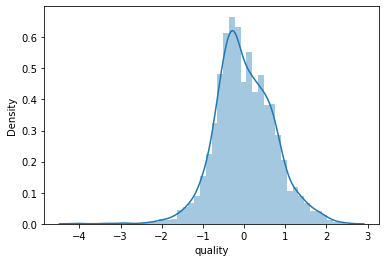

In [38]:
sns.distplot(y_test-y_pred)

In [39]:
# This appears to be a bell curve. Does this compare to what we covered during lecture?
# I noticed that some of the code is related to color and some is related to quality
# This code needs further review to see if it applies to the color model that I have been working on